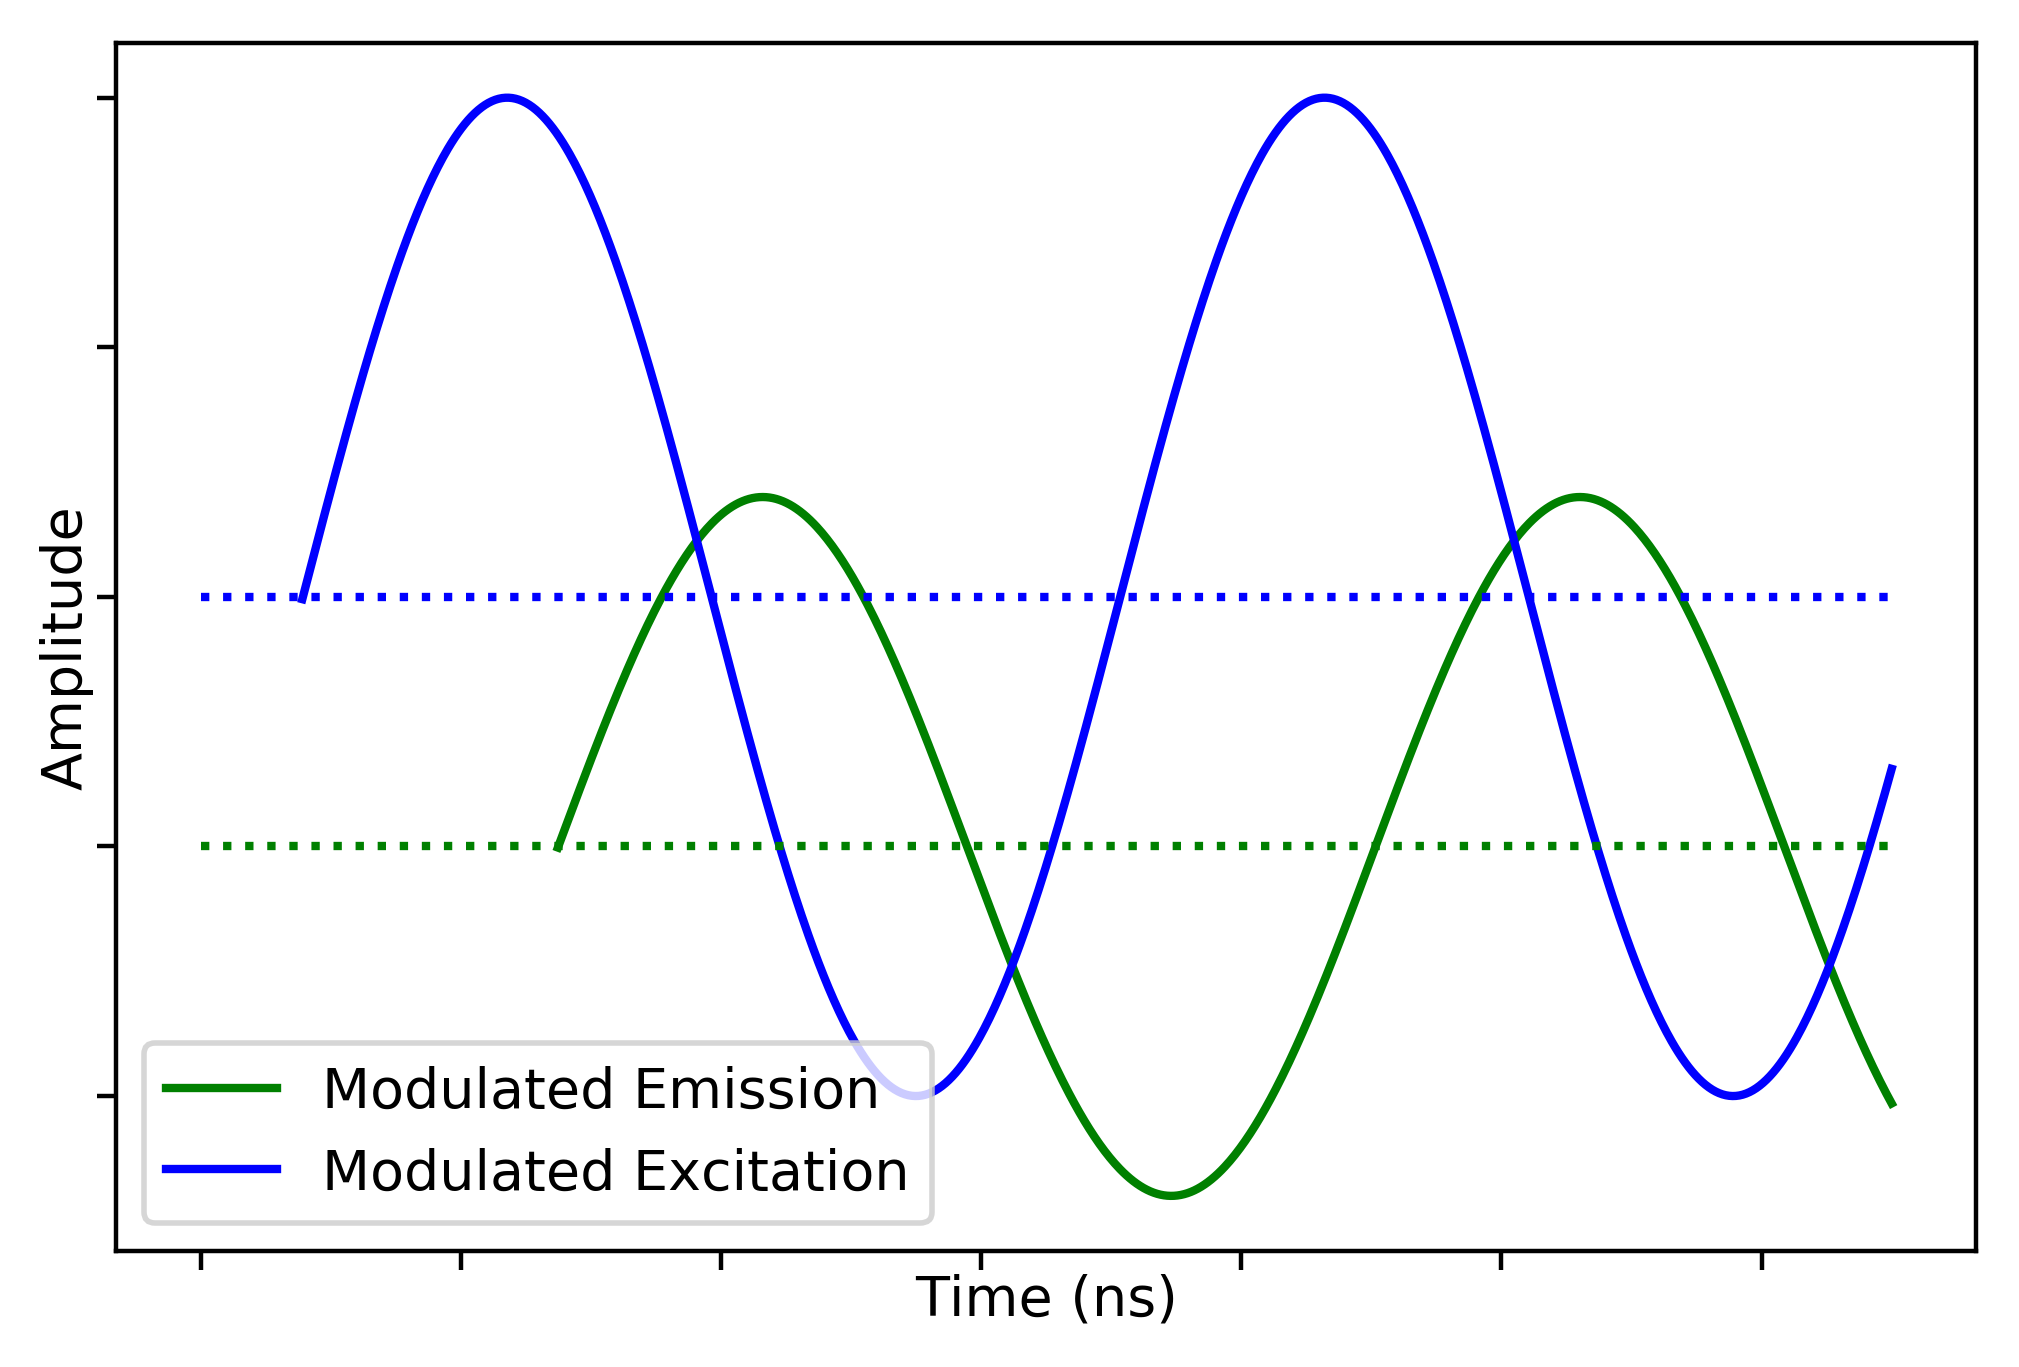

In [45]:
import numpy as np
import matplotlib.pyplot as plt

res = 1000
tot = 13

# Define the x values
x = np.linspace(0, tot, res)

# Define the sine waves with different offsets
y1_offset = 3.5 * np.pi/4
y2_offset = 1 * np.pi/4
y1 = 0.7 * np.sin(x - y1_offset) + 1.5
y2 = np.sin(x - y2_offset) + 2

# Define the horizontal lines with the same offsets as the sine waves
y3 = np.full_like(x, 1.5)
y4 = np.full_like(x, 2)

# Create a new figure and axis object
fig, ax = plt.subplots(dpi = 400)

# Plot the sine waves and horizontal lines
ax.plot(x[int(y1_offset * res/tot):], y1[int(y1_offset * res/tot):], label='Modulated Emission', color = 'green')
ax.plot(x[int(y2_offset * res/tot):], y2[int(y2_offset * res/tot):], label='Modulated Excitation', color = 'blue')
ax.plot(x, y3, color = 'green', linestyle = 'dotted')
ax.plot(x, y4, color = 'blue', linestyle = 'dotted')

ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)

# Add a legend, x-axis label, y-axis label, and title
ax.legend()
ax.set_xlabel('Time (ns)')
ax.set_ylabel('Amplitude')
# ax.set_title('Two Sin Waves and Two Horizontal Lines')

# Show the plot
plt.show()

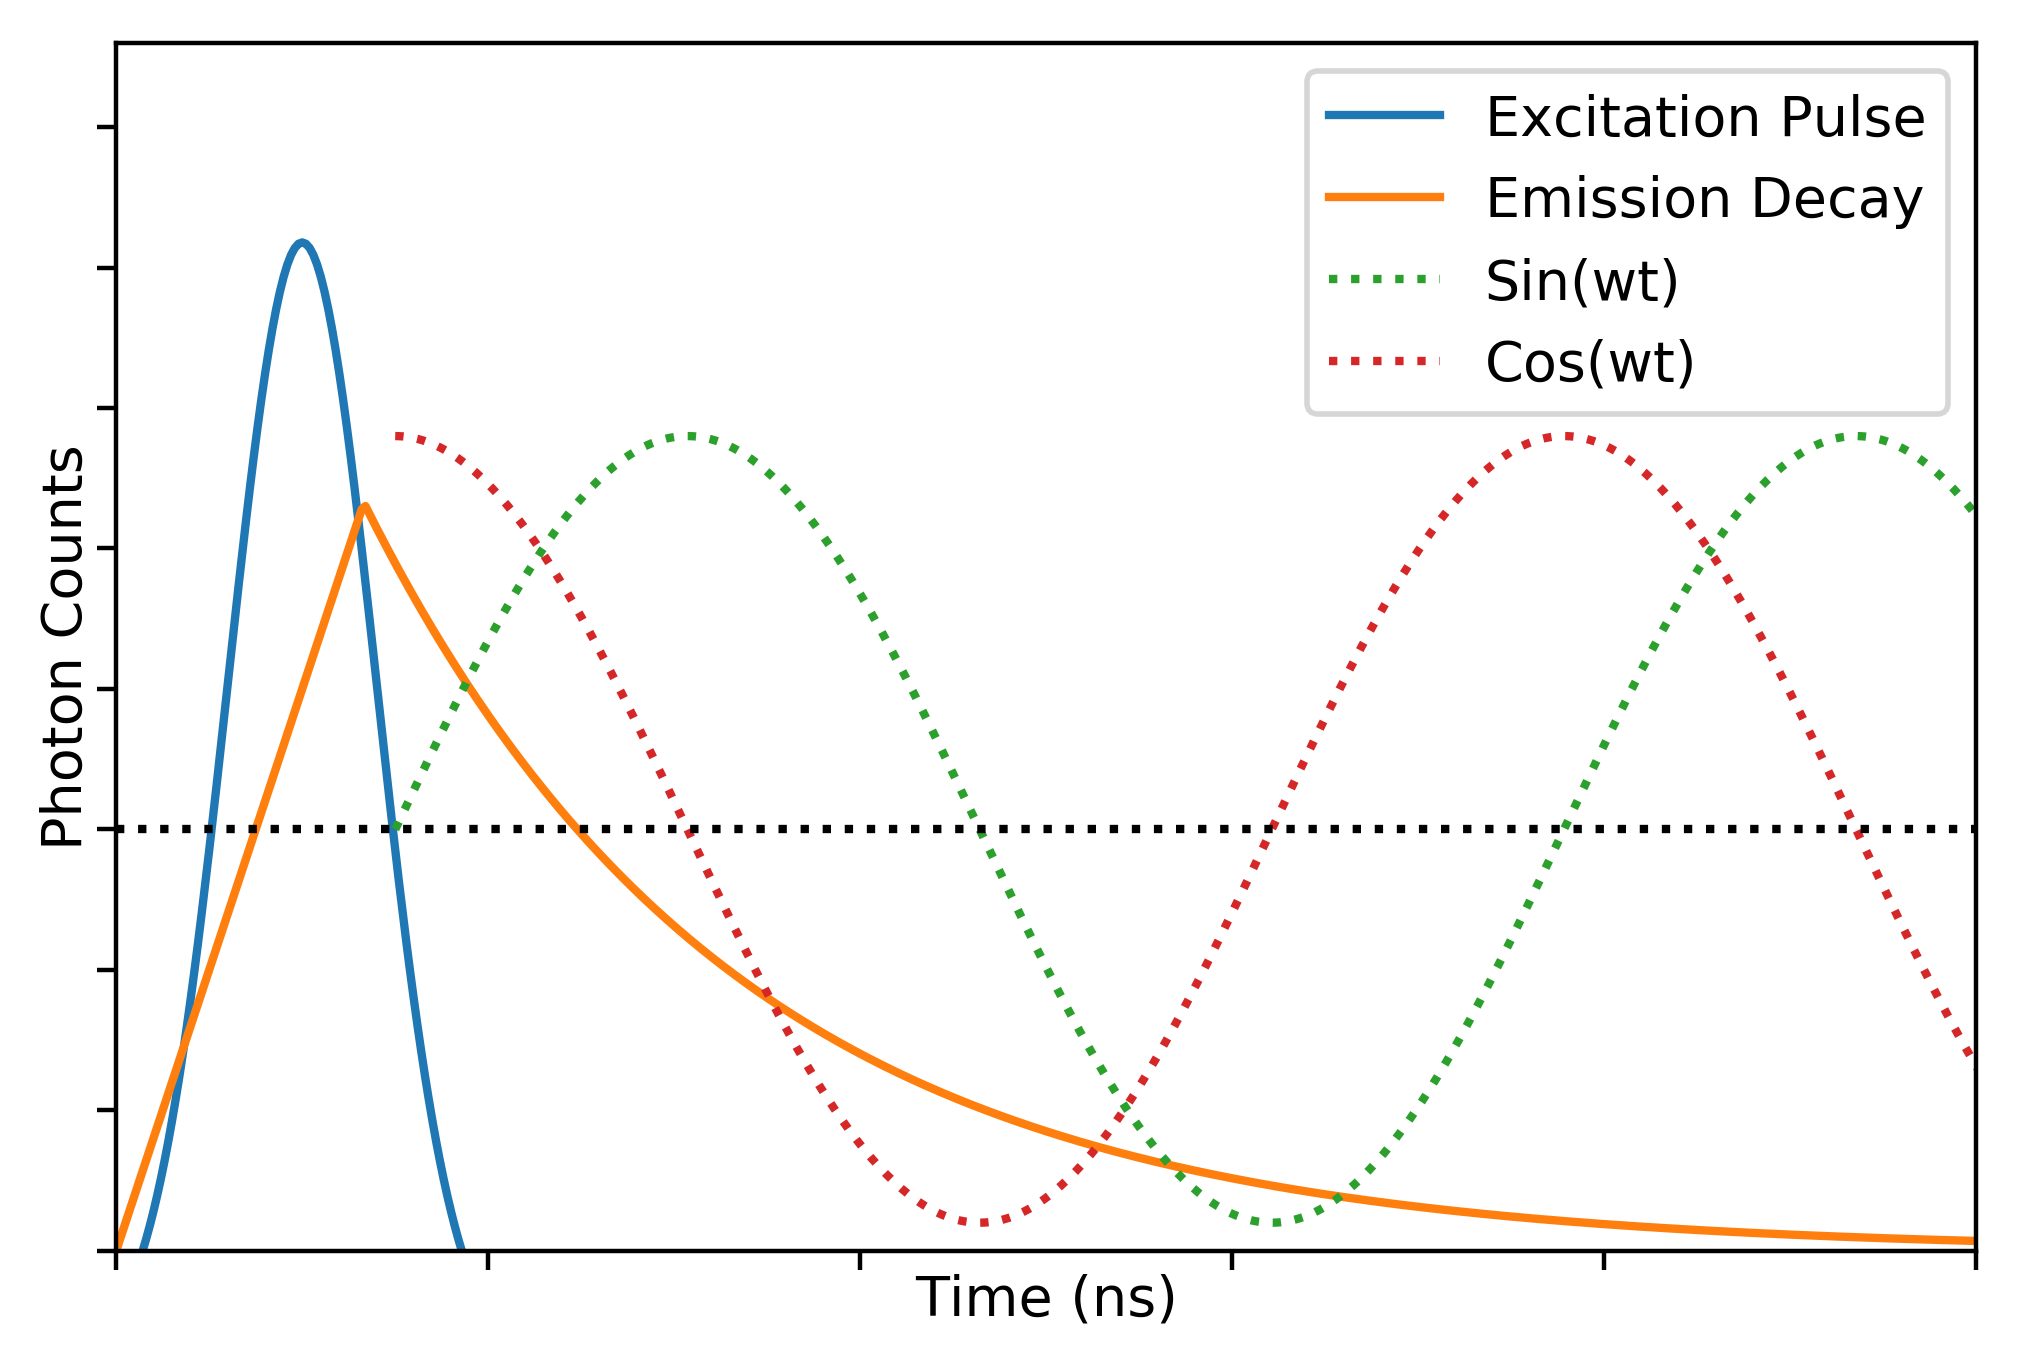

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define time range and resolution
t_min = 0
t_max = 10
dt = 0.01
t = np.arange(t_min, t_max, dt)
v_offset = 20

# Define excitation pulse parameters
exc_mean = 0.5
exc_std = 0.2
exc_amp = 100

# Generate excitation pulse
exc_pulse = exc_amp * norm.pdf(t, loc=exc_mean, scale=exc_std) - v_offset

# Define emission decay parameters
tau = 1
scaling = 0.85
emission_amp = np.max(exc_pulse) * scaling - v_offset

# Generate emission decay
emission = emission_amp * np.exp(-t / tau)

y2 = np.arange(0,np.max(emission),int(np.max(emission)/(exc_mean/dt)))
t_em = np.append(y2, emission)[:exc_pulse.shape[0]]

# Plot excitation pulse and emission decay
w = 2
samp = 70
soff = 75
shamp = 1.5
svamp = 75
fig, ax = plt.subplots(dpi = 400)
ax.plot(t, exc_pulse, label='Excitation Pulse')
ax.plot(t, t_em, label='Emission Decay')
ax.plot(t[soff:], samp * np.sin(w * t - shamp)[soff:] + svamp, linestyle = 'dotted', label = 'Sin(wt)')
ax.plot(t[soff:], samp * np.cos(w * t - shamp)[soff:] + svamp, linestyle = 'dotted', label = 'Cos(wt)')
ax.plot(t, svamp * np.ones(t.shape[0]), linestyle = 'dotted', color = 'black')
ax.set_xlabel('Time (ns)')
ax.set_ylabel('Photon Counts')
ax.legend()
ax.set_xlim(0,5)
ax.set_ylim(0,int(np.max(exc_pulse)*1.2))


ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)

plt.show()


In [59]:
y2

array([ 0., 50.])

In [55]:
em_offset

50.0